In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Dataset

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer() #real world dataset

# XX = breast_cancer.data
# Y = breast_cancer.target

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
# data is the full data dataframe

XX = data.drop('class', axis=1)
Y = data['class']
# dataframe. more convenient

XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.1, stratify=Y,random_state=1)
# returns same type as what was passed as input

### Binarise

MP neuron - takes binary input  
but real values in data => binarise those  
do something like : 1 if value above mean/median/some value.. , 0 if below.

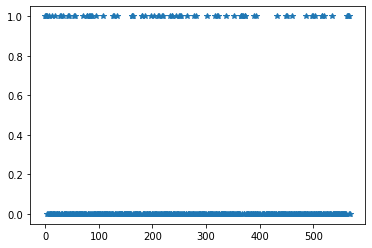

In [3]:
#binarising 
XX_binarised_train_check = XX_train['mean area'].map(lambda x: 0 if x<1000 else 1)

plt.plot(XX_binarised_train_check, '*')
plt.show()

#now 0s , 1s

binarising using pd.cut

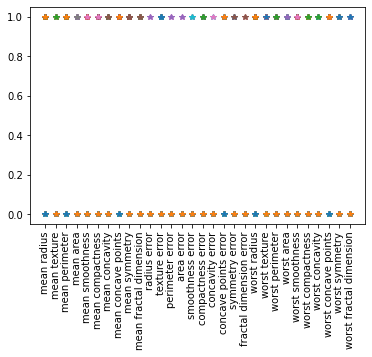

In [7]:
#binarising using libraries
XX_binarised_train = XX_train.apply(pd.cut, bins=2, labels=[0,1]) #returns dataframe
#apply() - apply function to each col. (pandas)
#cut - splits values into n bins.
#finds thresholds such that each bin have equal size.

plt.plot(XX_binarised_train.T,'*')
plt.xticks(rotation='vertical') #for the x labels to come vertically to not overlap
plt.show()

In [4]:
XX_binarised_test = XX_test.apply(pd.cut, bins=2, labels=[0,1]) #binarising test data

after doing table stuff, etc.. as dataframes:   
convert to numpy array for doing computational stuff(vectorisation..)..  
dataframe to numpy (df.values)  

In [8]:
XX_binarised_train = XX_binarised_train.values
XX_binarised_test = XX_binarised_test.values

type(XX_binarised_train)

numpy.ndarray

In [9]:
from random import randint

### MP neuron inference

In [11]:
#MP neuron
#inference and search

# random index (random datapoint)
i = randint(0, XX_binarised_train.shape[0])
print('for datapoint(row): ', i)

b = 3 # bias

if(np.sum(XX_binarised_train[i,:]) >=b ): #sum of all features(inputs)
    print("MP neuron inference is malignant")
else:
    print("MP neuron inference is benign")


# ground truth
if(Y_train[i]==1):
    print("GT is malignant")
else:
    print("GT is benign")

    
#goal is to find b.. so that max accuracy.

for datapoint(row):  483
MP neuron inference is benign
GT is malignant


### Accuracy

train accuracy - what fraction of train data is rightly predicted (comparing ground truth ouput and predicted ouput)  

similarly train accuracy

python  
zip - combine n iterables into one iterable-of-tuples; each tuple with n elements (one from each input, in order)  
useful to iterate over n iterables together(in order)

In [25]:
#accuracy for some b-value

b = 3
Y_pred_train = []
accurate_rows = 0 

for x, y in zip(XX_binarised_train, Y_train): #iterate two vectors using zip
    y_pred = (np.sum(x)>=b) #logical eqn - return a bool
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred) 

print(accurate_rows/XX_binarised_train.shape[0]) #accuracy

0.150390625


In [26]:
#accuracy for all b-values

for b in range(XX_binarised_train.shape[1]+1): # b range from 0 to #datapoints 
    
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(XX_binarised_train, Y_train): #iterate two vectors
        y_pred = (np.sum(x)>=b) #logical eqn - return a bool
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred) 

    print(b, accurate_rows/XX_binarised_train.shape[0]) #accuracy


0 0.626953125
1 0.240234375
2 0.185546875
3 0.150390625
4 0.154296875
5 0.181640625
6 0.21484375
7 0.244140625
8 0.275390625
9 0.298828125
10 0.3125
11 0.328125
12 0.3359375
13 0.34375
14 0.3515625
15 0.357421875
16 0.3671875
17 0.369140625
18 0.373046875
19 0.373046875
20 0.373046875
21 0.373046875
22 0.373046875
23 0.373046875
24 0.373046875
25 0.373046875
26 0.373046875
27 0.373046875
28 0.373046875
29 0.373046875
30 0.373046875


max accuracy when b = 0. (ouputing 1 always).   

why can't the model perform well?

In [27]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


mp neuron : y=1 when sum more than b.  
=> feature values 'contributing' to y=1 be 1(when binarised)  

from above summary, in all features, mean values are larger for benign case(ouput=0).. than malignant case(output=1).  
ie, feature values contributing to y=1 are lower values.  
therefore, while binarising, set 1 if feature value is 'less' than a threshold; and viceversa    

problem is with binarisation.  
flip the thresholding - 1 for lower values, 0 for higher values

In [28]:
XX_binarised_train = XX_train.apply(pd.cut, bins=2, labels=[1,0]) #flip 1,0
# set 1 if value is smaller than threshold and viceversa

#let smaller value contribute more - for infering y=1 (malignant)

XX_binarised_test = XX_test.apply(pd.cut, bins=2, labels=[1,0])

In [29]:
XX_binarised_train = XX_binarised_train.values
XX_binarised_test = XX_binarised_test.values

#for all b

for b in range(XX_binarised_train.shape[1]+1): # b range from 0 to #datapoints
    
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(XX_binarised_train, Y_train): #iterate two vectors
        Y_pred = (np.sum(x)>=b) #logical eqn - return a bool
        Y_pred_train.append(Y_pred)
        accurate_rows += (y == Y_pred) 

    print(b, accurate_rows/XX_binarised_train.shape[0]) #accuracy

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


now better accuracy values.  
b = 28 gives best.

### Validation in test data

In [32]:
pred_check = [1,2,3,4]
gt_check = [1,2,0,0]
accuracy_score(pred_check, gt_check)

0.5

In [34]:
from sklearn.metrics import accuracy_score
# accuracy from prediction, ground_turth
# what fraction is same in the two vectors(iterables)
# accuracy_score(one, two)

In [31]:
#check on test data. for b = 28

b = 28
Y_pred_test = []

for x in XX_binarised_test:
    y_pred = (np.sum(x)>=b) #logical eqn - return a bool
    Y_pred_test.append(y_pred) 

accuracy = accuracy_score(Y_pred_test, Y_test)

print(accuracy)

0.7894736842105263


A different b-value may give better accuracy in test data - but that is not in out control.  
We assume access to only train-data while training(learning).

### MP neuron class

Also a general template for implementing any model with classes

Classes - thing about the attributes/variables/data.   
the same variable being dealt my many function, etc..  
that is when to go for a class.  

In DL case -> "model parameters". they are getting updated, optimised, etc.  
also other functions for model stuff(they also use the parameters)


### Model class  
- init : parameters
- model : fn that takes one input and predict its ouput
- predict : fn that take entire data as input and do prediction for all. Useful as can do prediction on whole data for one set of parameters; then can find accuracy, etc.
- fit : learning algorithm to find the optimal parameter values. Takes all data and groud truth as input. Update self parameters.

In [35]:
from mp_neuron import MPNeuron
# import class 'MPNeuron' from py-file(module) 'mp_neuron'

In [36]:
mp_neuron = MPNeuron() #make class object

mp_neuron.fit(XX_binarised_train,Y_train)

optimal b is: 28
highest acc: 0.849609375


In [37]:
# validation on test data

Y_test_pred = mp_neuron.predict(XX_binarised_test)
accuracY_test = accuracy_score(Y_test_pred,Y_test)

print(accuracY_test)

0.7894736842105263
